# 1er livrable : Pré traitement
### Préparation de l'environnement

In [1]:
from PIL import Image
import numpy as np

JPEG (528, 297) RGB


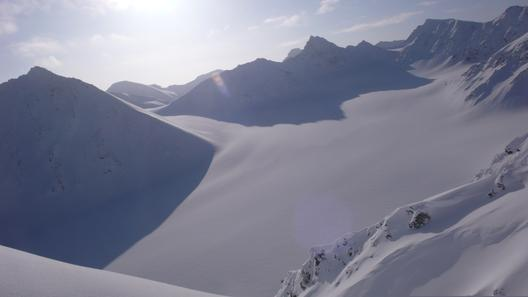

In [28]:
image = Image.open("Images/Images/2007041908_cam01p.jpg")
print(image.format, image.size, image.mode)
image

#### Les patches seront de taille 33, le plus grand PGCD entre 528 et 297

In [29]:
patch_size = 33

#### Fonction d'extraction des patches dans une images :

In [30]:
def extractpatch(image, patch_size):
    width, height = image.size
    patches = []

    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            box = (x, y, x + patch_size, y + patch_size)
            patch = image.crop(box)
            patches.append(patch)

    return patches

def patch2Vector(patch):
    patch_array = np.array(patch)
    return patch_array.flatten()


def vector2Patch(vector, patch_size):
    # Remodeler le vecteur colonne en une matrice
    patch_array = np.reshape(vector, (patch_size, patch_size, 3)) 
    # Convertir le tableau NumPy en objet Image
    patch_image = Image.fromarray(patch_array.astype('uint8'))

    return patch_image

# permet de reconstruire un image a partir des patchs
def reconstImage(vector_patched, patch_size, img_size):
    image_reconstruite = Image.new("RGB", img_size)
    largeur, hauteur = img_size

    indice_patch = 0
    for y in range(0, hauteur, patch_size):
        for x in range(0, largeur, patch_size):
            patch = vector_patched[indice_patch]
            boite = (x, y, x + patch_size, y + patch_size)
            image_reconstruite.paste(patch, boite)
            indice_patch += 1

    return image_reconstruite



#### Patched_image sera donc composé de 144 patches de l'image initiale (16*9)

In [31]:
patched_image = extractpatch(image, patch_size)

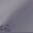

In [32]:
patched_image[143]

### Transformation en vecteurs colonnes :

In [33]:
vectorised_img = [patch2Vector(patch) for patch in patched_image]
vectorised_img[143]

array([142, 138, 152, ..., 104, 102, 116], dtype=uint8)

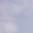

In [34]:
vector_patched = [vector2Patch(vector, patch_size) for vector in vectorised_img]
vector_patched[0]

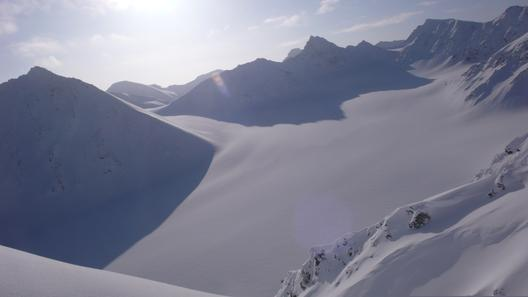

In [35]:
new_img = reconstImage(vector_patched, patch_size, image.size)
new_img